In [24]:
%pip install seaborn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [11]:
df = pd.read_csv('./2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


My first idea was to understand the regions that has the highest Happiness Score, by region because it was better to compare countries in the same region. For that, I created a dataframe based on the regions and added the mean happiness score.

In [89]:
df_regions_happiness = df.groupby('Region')['Happiness Score'].mean().reset_index(name='Mean Happiness Score')

# sort the value by the score
df_regions_happiness = df_regions_happiness.sort_values(by=['Mean Happiness Score'], ascending=False)

print(df_regions_happiness)

                            Region  Mean Happiness Score
0        Australia and New Zealand              7.285000
5                    North America              7.273000
9                   Western Europe              6.689619
3      Latin America and Caribbean              6.144682
2                     Eastern Asia              5.626167
4  Middle East and Northern Africa              5.406900
1       Central and Eastern Europe              5.332931
6                Southeastern Asia              5.317444
7                    Southern Asia              4.580857
8               Sub-Saharan Africa              4.202800


Creating the individual representation of the Happiness Score to analyse the outliers per region.

My idea was create a individual representation by each Region on the dataset to represent the Happiness Score of the countries. For creating this, I made a list of the regions on the dataset and filtered by region, after that, I added a scale to represent all the boxplots in the same scale.

It was possible to see the variation of each region and notice the outlier on the Latin America region.


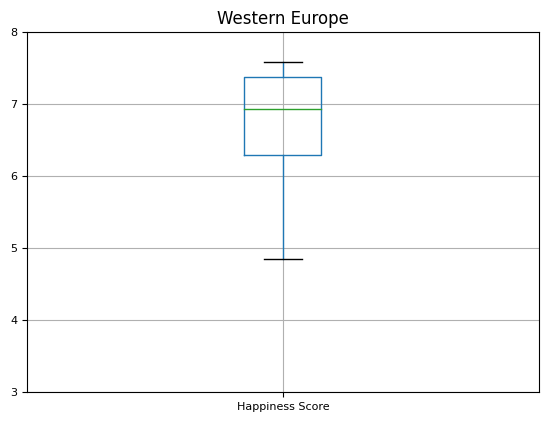

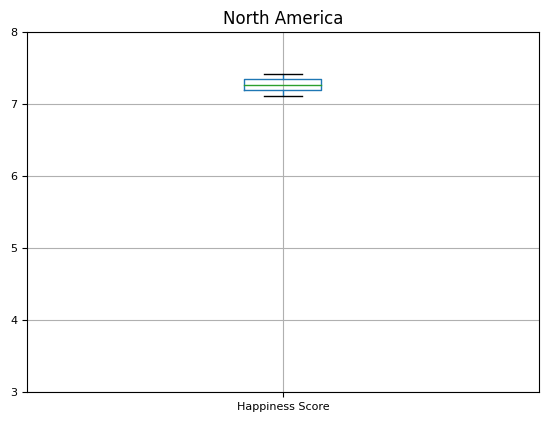

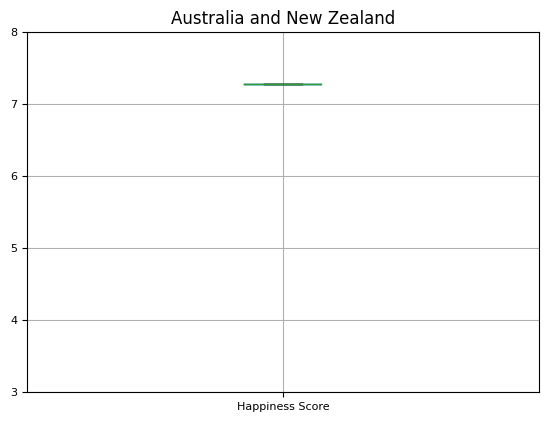

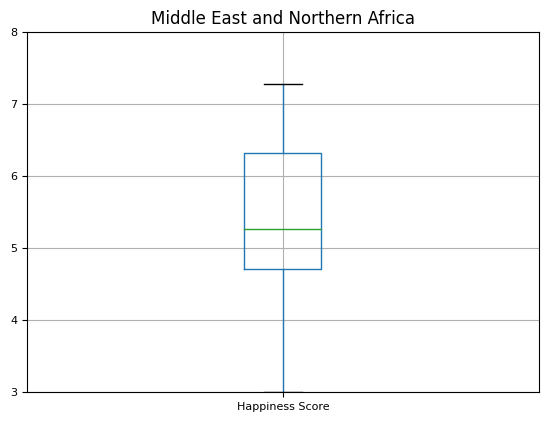

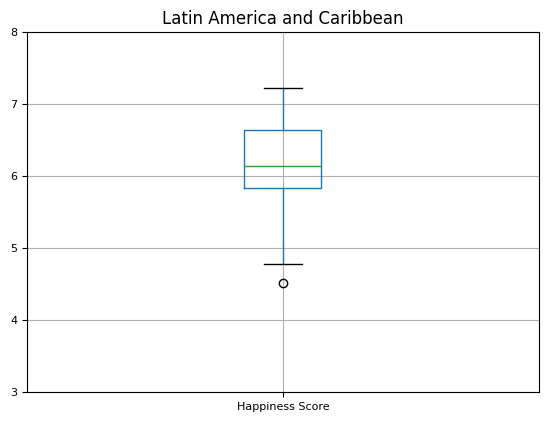

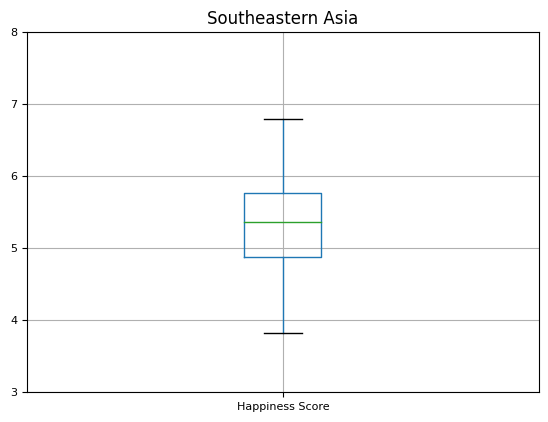

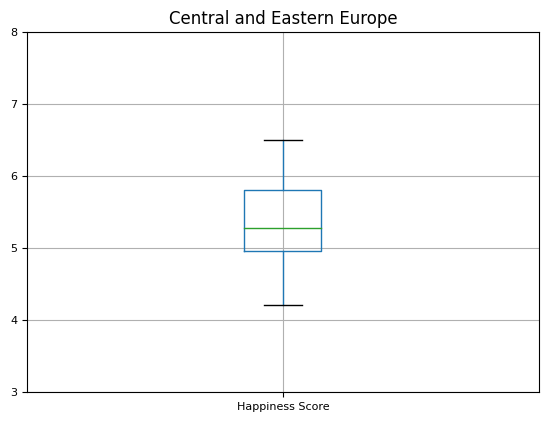

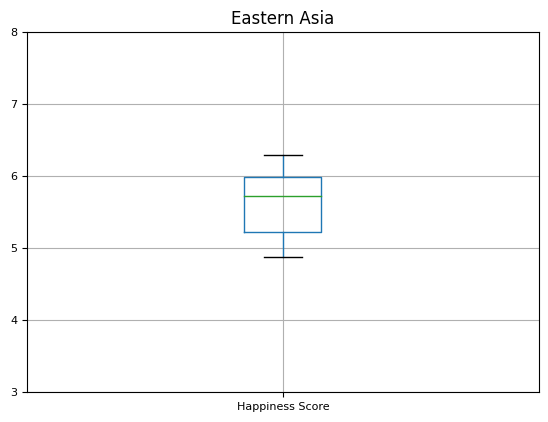

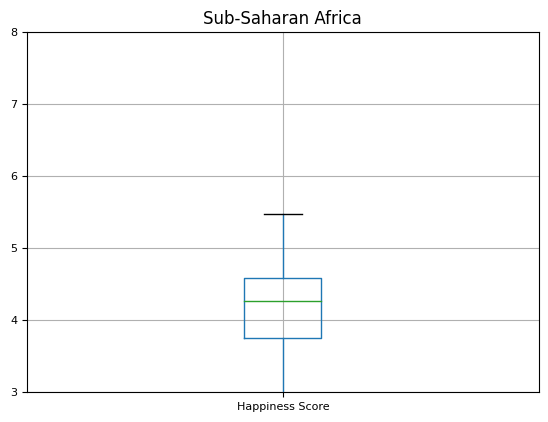

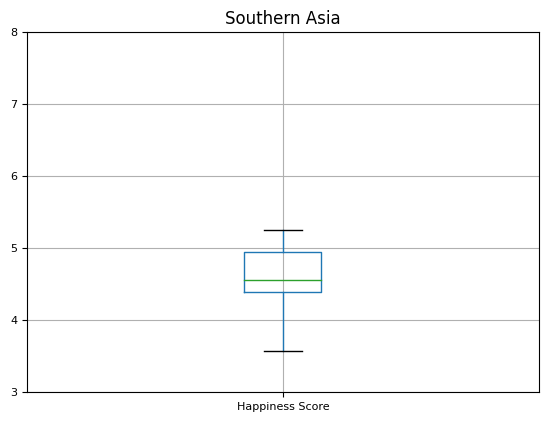

In [87]:
# creating a dynamic list of reagions existing
regions = df["Region"].unique()

for i in regions:
    # filtering by region and creating a boxplot to visualize the region data per happiness score
    temporary_df = df[df.Region == i]
    temporary_df.groupby("Region").boxplot(column="Happiness Score", fontsize=8);

    # setting the y scale to have a better overview
    plt.ylim(3, 8)


To understand better the previous result, I wanted to verify which is the country that has less score on the Latin American and Caribbean (the outlier represented on the boxplot).

In [105]:
df_latin_america = df[df.Region == 'Latin America and Caribbean']
df_latin_america = df_latin_america.sort_values(by=['Happiness Score'], ascending=True)

# getting the lowest happiness score (outlier represented on the boxplot
min_happiness_score_latin_america = df_latin_america['Happiness Score'].min()
country_min_happiness_score_latin_america = df_latin_america[df_latin_america['Happiness Score'] == min_happiness_score_latin_america]['Country']

print('The country outlier on Latin America is: ', country_min_happiness_score_latin_america.to_string())

The country outlier on Latin America is:  118    Haiti


For an analyse that could relate the Happiness and the Economy I created a plot that shows the Economy x Happiness score and paint the plot based on the Region, so it's possible to see the clear concentration of this relation on the countries of Sub-Saharan Africa on the left down of the plot.

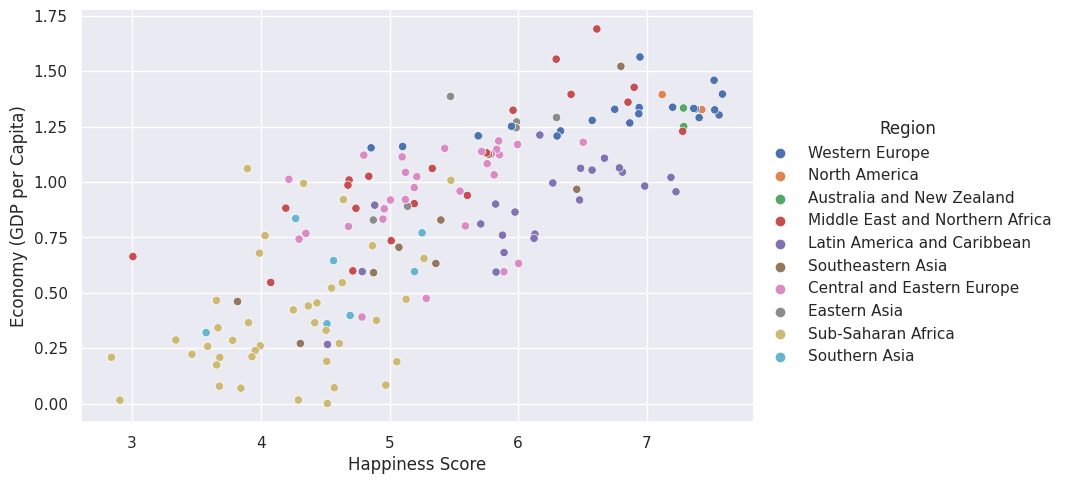

In [31]:
df_happiness_economy = df

# creating the scatter plot
sns.relplot(data=df_happiness_economy, x='Happiness Score', y='Economy (GDP per Capita)', hue='Region', aspect=1.61)
plt.show()

Another question that I made to myself is if there's a relation between the economy and the trust on the government, for that, I created a scallet plot relating thoses informationd and adding the colour by region again.

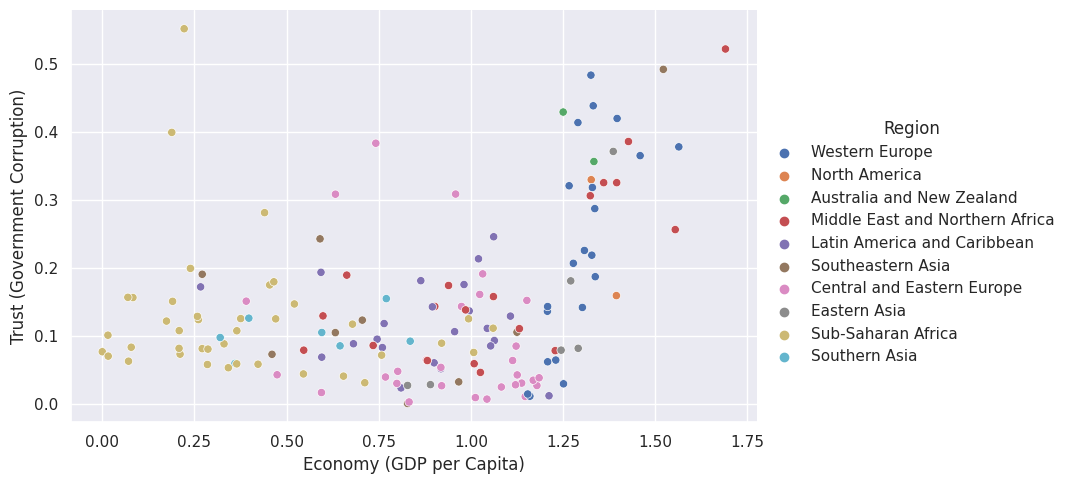

In [32]:
df_trust_economy = df

# creating the scatter plot
sns.relplot(data=df_trust_economy, y='Trust (Government Corruption)', x='Economy (GDP per Capita)', hue='Region', aspect=1.61)
plt.show()

To analyse the Dystopia, first I created the relation by the region, and for my surprise, the Latin America and Caribbean was in first of the mean.

In [42]:
df_dystopia = df

df_dystopia = df_dystopia.groupby('Region')['Dystopia Residual'].mean().reset_index(name='Mean Dystopia')

# sort the value by the score
df_dystopia = df_dystopia.sort_values(by=['Mean Dystopia'], ascending=False)

print(df_dystopia)

                            Region  Mean Dystopia
3      Latin America and Caribbean       2.622577
5                    North America       2.480935
0        Australia and New Zealand       2.265355
9                   Western Europe       2.151185
1       Central and Eastern Europe       2.021400
8               Sub-Saharan Africa       2.019980
7                    Southern Asia       2.016769
4  Middle East and Northern Africa       1.980008
6                Southeastern Asia       1.783020
2                     Eastern Asia       1.681607


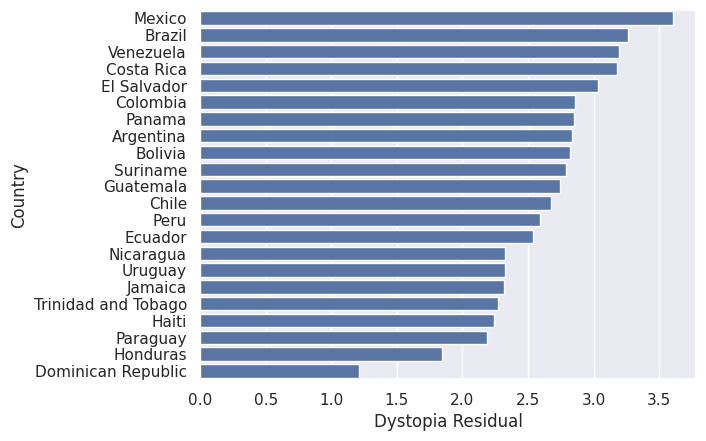

In [58]:
df_dystopia_latin = df

# filter the latin america and caribbean data
df_dystopia_latin = df_dystopia_latin[df_dystopia_latin.Region == 'Latin America and Caribbean']

# sort the data by dystopia
df_dystopia_latin = df_dystopia_latin.sort_values(by=['Dystopia Residual'], ascending=False)

g = sns.barplot(
    data=df_dystopia_latin,
    y="Country", x="Dystopia Residual",
    color='b'
)

plt.show()

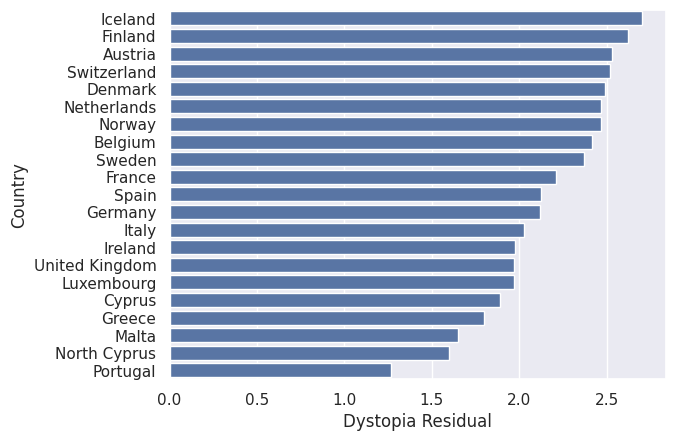

In [60]:
df_dystopia_western_eu = df

# filter the latin america and caribbean data
df_dystopia_western_eu = df_dystopia_western_eu[df_dystopia_western_eu.Region == 'Western Europe']

# sort the data by dystopia
df_dystopia_western_eu = df_dystopia_western_eu.sort_values(by=['Dystopia Residual'], ascending=False)

g = sns.barplot(
    data=df_dystopia_western_eu,
    y="Country", x="Dystopia Residual",
    color='b'
)

plt.show()